# Diamonds Price Prediction



### Project Overview

A jewelry company wants to put in a bid to purchase a large set of diamonds, but is unsure how much it should bid. In this project, I have used a predictive model to make a recommendation on how much the jewelry company should bid for the diamonds

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the datasets
diamonds = pd.read_csv('diamonds.csv') # training data
new_diamonds = pd.read_csv('new-diamonds.csv') # predictions data

In [3]:
# check first 5 rows of training data
diamonds.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [4]:
# check first 5 rows of predictions data
new_diamonds.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [5]:
# check some basic information about the data
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   carat        50000 non-null  float64
 2   cut          50000 non-null  object 
 3   cut_ord      50000 non-null  int64  
 4   color        50000 non-null  object 
 5   clarity      50000 non-null  object 
 6   clarity_ord  50000 non-null  int64  
 7   price        50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [6]:
new_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3000 non-null   int64  
 1   carat        3000 non-null   float64
 2   cut          3000 non-null   object 
 3   cut_ord      3000 non-null   int64  
 4   color        3000 non-null   object 
 5   clarity      3000 non-null   object 
 6   clarity_ord  3000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 164.2+ KB


In [7]:
# drop the unwanted columns from both the datasets
diamonds.drop(['Unnamed: 0', 'cut_ord', 'clarity_ord'], axis = 1, inplace = True)
new_diamonds.drop(['Unnamed: 0', 'cut_ord', 'clarity_ord'], axis = 1, inplace = True)

In [8]:
diamonds.head()

,carat,cut,color,clarity,price
0,0.51,Premium,F,VS1,1749
1,2.25,Fair,G,I1,7069
2,0.70,Very Good,E,VS2,2757
3,0.47,Good,F,VS1,1243
4,0.30,Ideal,G,VVS1,789


In [9]:
new_diamonds.head()

,carat,cut,color,clarity
0,1.22,Premium,G,SI1
1,1.01,Good,G,VS2
2,0.71,Very Good,I,VS2
3,1.01,Ideal,D,SI2
4,0.27,Ideal,H,VVS2


In [10]:
# check out number of rows and columns
diamonds.shape

(50000, 5)

In [11]:
new_diamonds.shape

(3000, 4)

In [12]:
# check for any null values
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

In [13]:
new_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
dtype: int64

In [14]:
# check out the unique categories in each categorical column in training data
cols = ['cut', 'color', 'clarity']
for col in cols:
    print(col,":")
    print(diamonds[col].unique())

cut :
['Premium' 'Fair' 'Very Good' 'Good' 'Ideal']
color :
['F' 'G' 'E' 'D' 'H' 'J' 'I']
clarity :
['VS1' 'I1' 'VS2' 'VVS1' 'SI1' 'VVS2' 'SI2' 'IF']


In [15]:
from sklearn.preprocessing import LabelEncoder

I have used ordinal or label encoding as the categorical features are ordinal i.e. order/ rank matters within categories

In [16]:
labelencoder = LabelEncoder()

In [17]:
# Encoding
cols = ['cut', 'color', 'clarity']
for col in cols:
    diamonds[col] = labelencoder.fit_transform(diamonds[col])

for col in cols:
    new_diamonds[col] = labelencoder.fit_transform(new_diamonds[col])

Encoding is basically converting categorical variables into numeric variables to train a machine learning model

In [18]:
# check out the encoded features
diamonds.head()

,carat,cut,color,clarity,price
0,0.51,3,2,4,1749
1,2.25,0,3,0,7069
2,0.70,4,1,5,2757
3,0.47,1,2,4,1243
4,0.30,2,3,6,789


In [19]:
new_diamonds.head()

,carat,cut,color,clarity
0,1.22,3,3,2
1,1.01,1,3,5
2,0.71,4,5,5
3,1.01,2,0,3
4,0.27,2,4,7


At this point I have checked for the reationship between different features with the target variable from training data using a heatmap which gives the correlation of all the columns present in a dataframe with each other

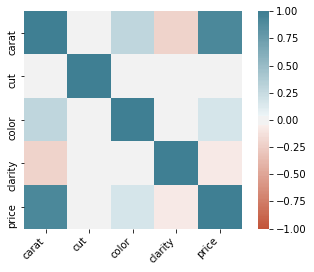

In [20]:
# find correlation between all the columns of trainig data (diamonds.csv)
corr = diamonds.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the above heatmap it can be seen that the feature carat has the strongest correlation with target variable price than any other feature. So I have plotted carat against price in a scatter plot to visualize the relationship between these two columns

Text(0, 0.5, 'Price')

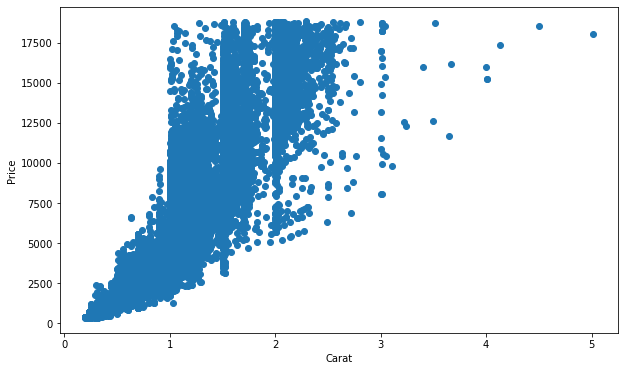

In [21]:
# scatter plot between carat and price
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(diamonds['carat'], diamonds['price'])
plt.xlabel("Carat")
plt.ylabel("Price")

It can be seen from the above graph that carat and price have a linear relationship, therefore we'll need to use a linear model

In [22]:
# import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
# separate the data into independent columns (features) and dependent column (target variable)
X = diamonds.drop('price', axis = 1)
y = diamonds['price']

In [24]:
# instantiate the scaler object
scaler = MinMaxScaler()

We'll use MinMaxScaler to scale the features between 0 and 1 to get the optimized results from Linear Regression model

In [25]:
# scale the features of both the datasets
X = scaler.fit_transform(X)
TestData = scaler.fit_transform(new_diamonds)

In [26]:
# split the diamonds.csv dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# instantiate a linear regression object
regressor = LinearRegression()

In [28]:
# fit the linear regression model on training data from diamonds.csv
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
# r-squared value of training data
regressor.score(X_train, y_train)

0.877004824530451

In [30]:
# r-squared value of testing data
regressor.score(X_test, y_test)

0.8794657322191419

The r-squared value for training and testing data shows that model gave pretty much good results and performed pretty well on both training and testing data

Now we'll fit our model on the diamonds.csv data to predict the prices for new_diamonds.csv

In [31]:
# fit the model on diamonds.csv data
regressor.fit(X,y)

LinearRegression()

In [32]:
# predict the prices for the other dataset
y_pred = regressor.predict(TestData)

In [33]:
# Add the predicted prices column to the dataset
new_diamonds["Predicted Price"] = y_pred

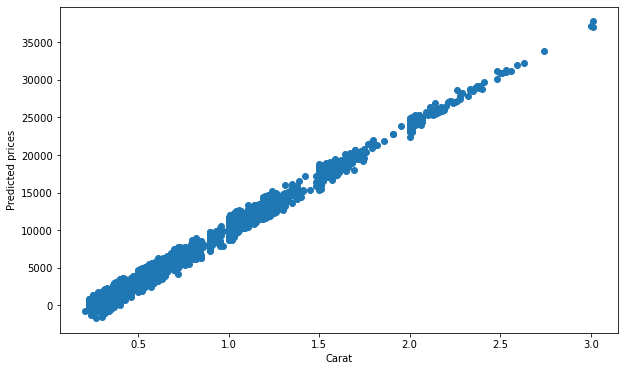

In [34]:
# plot carat vs predicted price
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = new_diamonds['carat'], y = new_diamonds['Predicted Price'])
plt.ylabel("Predicted prices")
plt.xlabel("Carat")
plt.show()

The model is a good fit for the data as the model has a given a good prediction for most of the values and it can be seen from the r-squared value and from the above graph as well. But it may also predict wrong price values for some pieces of diamonds

In [36]:
# check out the newly added Predicted Price column
new_diamonds.head()

,carat,cut,color,clarity,Predicted Price
0,1.22,3,3,2,12696.951711
1,1.01,1,3,5,10497.385196
2,0.71,4,5,5,5945.754662
3,1.01,2,0,3,10723.120102
4,0.27,2,4,7,424.072243


In [37]:
# Find the sum of Predicted Price column
total_price = new_diamonds['Predicted Price'].sum()

In [38]:
total_price

21952841.973982625

The diamond price that the model has predicted represents the final retail price the consumer will pay but
The company generally purchases diamonds from distributors at 70% of that price. So,

In [39]:
final_price = total_price*0.7

In [40]:
final_price

15366989.381787837

This is the final price at which the company should bid for the diamonds